## Case:

An ant leaves its anthill in order to forage for food. It moves with the speed of 10cm per second, but it doesn't know where to go, therefore every second it moves randomly 10cm directly north, south, east or west with equal probability.

1. If the food is located on east-west lines 20cm to the north and 20cm to the south, as well as on north-south lines 20cm to the east and 20cm to the west from the anthill, how long will it take the ant to reach it on average?
2. What is the average time the ant will reach food if it is located only on a diagonal line passing through (10cm, 0cm) and (0cm, 10cm) points?
3. Can you write a program that comes up with an estimate of average time to find food for any closed boundary around the anthill? What would be the answer if food is located outside an defined by <br>
$( \frac{x – 2.5cm} {30cm} )^2 + ( \frac{y – 2.5cm} {40cm} )^{2} < 1$ <br>
in coordinate system where the anthill is located at (x = 0cm, y = 0cm)? Provide us with a solution rounded to the nearest integer.



Let us identify the case as simple random walk in $\mathbb{Z}^2$

#### 1. Boxed by food 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations 


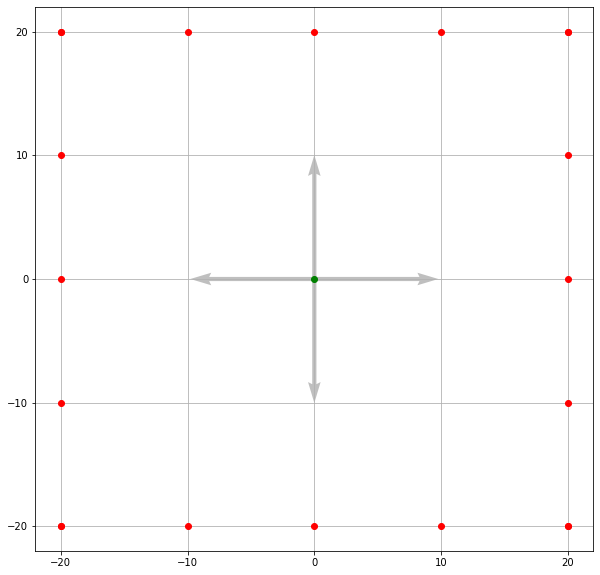

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
velocity = 10

movement_vectors = np.array([[0,velocity], [velocity,0], [0,-1*velocity], [-1*velocity,0]])

def plot_ant(ax, movement_vectors, scale = 45):
   
    origin = np.array([[0, 0, 0, 0],[0, 0, 0, 0]]) # origin point
    ax.quiver(*origin, movement_vectors[:,0], movement_vectors[:,1], scale = scale, alpha = 0.25)
    ax.plot(0,0, 'go', label = 'origin')
    

plot_ant(ax, movement_vectors, 45)

food = np.linspace(-20,20,5)
coord = np.full((len(food)),20)
a=permutations ([food, coord],2)
for i in a:
    for j in (1,-1):
        ax.plot(j*i[0],j*i[1],'ro')

def plot_grid(ax):
    major_ticks = np.arange(-20, food[-1]+1, 10)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.grid()
plot_grid(ax)
plt.show()

$P(+1) = P(-1) = 1/4; P(0) = 1/2$


One way to study stochastic processes is simulation, here is a simulation I wrote on a train using python for Android: 

Average length of a random walk is 4.486 based on parameters: iterations: 1000 , distance from origin: 20, velocity: 10, 


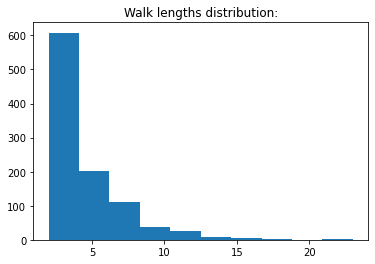

In [3]:
def distance (coord =(1,1)): #default value for testing purposes
    ''' Pythagoras theorem'''
    import math
    return math.sqrt(sum((i**2 for i in coord)))

def move(coord = (0,0), v=10):
    
    import random
    steps = ((0,v),(v,0),(0,-1*v),(-1*v,0))
    step = random.choice(steps)
    return [sum(x) for x in zip(coord,step)]

def simulate_1(limit=20, v = 10):
    coord =(0,0)    
    length = 0
    while distance (coord)<limit:
        length+=1
        coord = move(coord,v)
    return length, coord

iterations = 1000
velocity = 10
dist = 20
lengths =()
coords = ()
for i in range (iterations):
    l, c = simulate_1(dist,velocity)
    lengths+=l,
    coords+=c,
time = sum(lengths)/len(lengths)

print('Average length of a random walk is {} based on parameters: iterations: {} , distance from origin: {}, velocity: {}, '.format(time, iterations, dist, velocity))
plt.title(label= 'Walk lengths distribution:')
plt.hist(lengths)
plt.show()


https://digitalcommons.wku.edu/cgi/viewcontent.cgi?article=2504&context=theses
https://stackoverflow.com/questions/69246926/average-time-to-hit-a-given-line-on-2d-random-walk-on-a-unit-grid
https://galileo.phys.virginia.edu/classes/152.mf1i.spring02/RandomWalk.htm
https://nvlpubs.nist.gov/nistpubs/jres/46/jresv46n6p462_A1b.pdf


In [4]:
#and distance to go back??

### 2. Food on a diagonal

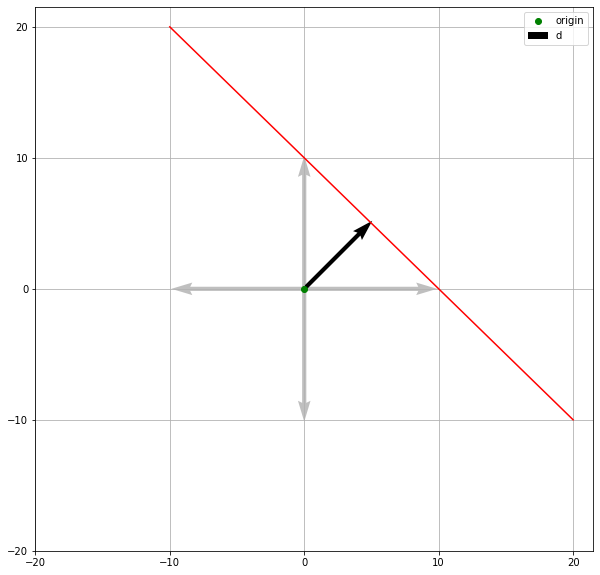

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_ant(ax,movement_vectors,scale = 42)
ax.quiver(5,5,scale = 41, label = 'd')
food_x = np.arange(-10,21,10)
food_y = 10-food_x
plt.plot(food_x,food_y, 'r-')
plot_grid(ax)
plt.legend()
plt.show()

Let $\vec{d}$ be a shortest path from the origin to food <br>
Let $V$ be a set of possivle movements for the ant. Expressing $V$ in terms of $d$ we see that the and move to the food or away from the food based on a result of a fair coin toss with the speed of 1<br>

Let us adapt the argument from [here](https://web.mit.edu/neboat/Public/6.042/randomwalks.pdf), page 6: <br>
Let S be the number of steps until we hit a boundary, that is, until we find the food. <br>
Let $En = Ex (S |D_0 = n)$ be the expected time to find food given that we start with n units distance from it. <br>
Following the argument: <br>
$En = mn$ <br>

What is m? it is a variable we are missing, the opposite boundary. <br>

"in an unbiased game, you expect to play for the product of the amount you’re willing to lose times the amount you want to win. As
a corollary, if you never quit when you’re ahead, then you can expect to play forever in a fair game. "<br>

Therefor it would seem that in this situation $Em \to \infty$ <br>

This seem intuitive, since there is infinite number of random walks that will not end up crossing the line.


In [ ]:
v = 10
movement_vectors = np.array(((0,v),(v,0),(0,-1*v),(-1*v,0)))